<a href="https://colab.research.google.com/github/YunJinHeo/Machine-learning-Deep-learning-to-study-alone/blob/main/CH8_Artificial_Neural_Networks_for_images/CH8_Artificial_Neural_Networks_for_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 08-1 합성곱 신경망의 구성 요소

## 합성곱




**합성곱 신경망(convolutional neural network, CNN)** : 1개 이상의 합성곱 층을 쓴 인공 신경망으로 이미지, 영상 분석에 유용하다.

 CNN에서는 완전 연결 신경망과 달리 뉴런을 **필터filter**혹은 **커널kernel**이라고 부른다.

 합성곱 계산을 통해 얻은 출력을 **특성 맵feature map**이라고 부른다.

## 케라스 합성곱 층



케라스의 층은 모두 keras.layers 패키지 아래 클래스로 구현되어 있다.

 입력 위를 (왼쪽에서 오른쪽으로, 위에서 아래로) 이동하는 합성곱은 Conv2D클래스로 제공된다.

    from tensorflow import keras
    keras.layers.Conv2D(10, kernel_size=(3,3), activation = 'relu')

1) 패딩과 스트라이드
 패딩(padding) : 배열의 주위를 가상의 원소로 채우는 것

 세임 패딩(same padding) : 입력과 특성 맵의 크기를 동일하게 만들기 위해 입력 주위를 0으로 패딩하는 것

 밸리드 패딩(valid padding) : 패딩 없이 순수한 입력 배열에서만 합성곱을 하여 특성 맵을 만드는 경우를 말하며, 특성  맵의 크기가 입력보다 줄어들게 된다.

 **패딩을 하는 이유** : 패딩을 하지 않으면 모서리의 정보는 합성곱에 참여하는 비율이 줄어들어 정보가 손실되기 때문이다.

 padding 매개변수를 지정할 수 있다. 기본값은 'valid'이며, 세임 패딩을 사용하려면 'same'으로 지정하면 된다.

     keras.layers.Conv2D(10, kernel_size=(3,3), activaiton='relu', padding='same')

 스트라이드(stride) : 필터의 이동 크기

  스트라이드의 기본 값은 1이며 즉, 필터가 한 칸씩 이동하게 된다. strides 매개변수를 이용해 변경할 수 있으나 변경하는 경우는 드물다.

In [ ]:
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same', strides=1)

<Conv2D name=conv2d, built=False>

2) 풀링

 풀링(pooling) : 합성곱 층에서 만든 특성 맵의 가로세로 크기를 줄이는 역할을 수행한다. 모든 특성맵에 대해 각각 실행해주기 때문에 특성 맵의 개수는 변하지 않는다. 합성곱과 마찬가지로 커널이 입력 위를 지나가며 특성 맵을 만들지만, 가중치가 없어 가장 큰 값을 고르거나 평균 값을 계산한다. 이를 각각 최대 풀링(max pooling)과 평균 풀링(average pooling)이라고 부른다.

  풀링을 할 때에는 커널이 한 칸씩 이동하지 않고 이전 커널과 겹치지 않게 이동한다. 따라서 풀링의 크기가 (n,n)이라면 가로세로 n칸씩 이동한다.

  케라스에서 MaxPooling2D, AveragePooling2D 클래스로 풀링을 수행할 수 있다. 매개변수로 풀링의 크기를 지정할 수 있으며 풀링의 크기가 2이면 가로세로 크기를 절반으로 줄이게 된다.

    keras.layers.MaxPooling2D(2)
    keras.layers.AveragePooling2D(2)

 평균 풀링은 특성 맵에 있는 중요한 정보를 평균하여 희석시킬 수있기 때문에 일반적으로 평균 풀링보다는 최대 풀링을 많이 사용한다.

 **풀링을 사용하는 이유** : 합성곱에서 스트라이드를 크게 하여 특성 맵을 줄이는 것보다 풀링 층에서 크기를 줄이는 것이 경험적으로 더 나은 성능을 내기 때문이다.


## 합성곱 신경망의 전체 구조

1) 입력

 ex (4,4)

2) 합성곱 층(세임 패딩)

 ex (3,3) 필터 3개를 이용한다고 하면, (4,4,3)

3) 풀링층

 ex (2,2) 최대 풀링을 한다고 하면, (2,2,3)

4) 밀집층(소프트맥스 활성화 함수)

 ex 3차원 배열을 1차원 배열로 바꾼 후 예측 (12,)

**컬러 이미지를 사용한 합성곱**

 컬러 이미지는 RGB 채널로 구성되어 있기 때문에 3차원 입력값을 갖는다. 이때는, 커널또한 깊이가 있어야 하며 커널 배열의 깊이는 입력의 깊이와 같다.

 합성곱 신경망과 풀링을 여러번 진행하는 경우, 필터의 개수만큼 깊이가 깊어지고 풀링의 횟수만큼 특성 맵의 크기가 점점 줄어들게 된다.

# 08-2 합성곱 신경망을 사용한 이미지 분류

1) Conv2D : 입력의 너비와 높이 방향의 합성곱 연산을 구현한 클래스

* 매개변수

 kernel_size : 필터의 커널 크기를 지정한다. 정수혹은 튜플로 지정할 수 있다.

 strides : 필터의 이동 간격을 지정한다.

 padding : 입력의 패딩 타입을 지정한다. 기본 값은 vali로 패딩하지 않으며 'same'으로 설정시 세임 패등을 한다.

 activation : 활성화 함수를 지정한다.

2) MaxPooling2D : 입력의 너비와 높이를 줄이는 풀링 연산을 구현한 클래스

  첫 번째 매개변수로 풀링의 크기를 지정하며, 정수혹은 튜플로 지정할 수 있다.

  strides, padding 등의 매개변수가 있으나 잘 사용하지 않는다.

3) plot_model() : 케라스 모델 구조를 주피터 노트북에 그리거나 파일로 저장한다.

## 패션 MNIST 데이터 불러오기

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## 합성곱 신경망 만들기

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1))) # 첫번째 합성곱 층 추가(필터 32개) -> (28,28,32)

In [ ]:
model.add(keras.layers.MaxPool2D(2)) # 풀링 층 추가 -> (14,14, 32)

In [ ]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same')) # 두번째 합성곱 층 추가(필터 64개) -> (14, 14, 64)
model.add(keras.layers.MaxPool2D(2)) # 폴링 층 추가 -> (7,7,64)

In [ ]:
model.add(keras.layers.Flatten()) # 1차원으로 펼치기 -> (7*7*64, )
model.add(keras.layers.Dense(100, activation='relu')) # 밀집 은닉층 추가
model.add(keras.layers.Dropout(0.4)) # 40% 드롭아웃 층 추가
model.add(keras.layers.Dense(10, activation='softmax')) # 출력층 추가

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

**keras.utils.plot_model**

층의 구성을 그림으로 펴현해주는 plot_model() 함수를 이용할 수 있다.

* 매개변수

 show_shapes : True로 설정하면 그림에서 입력과 출력의 크기를 표시해준다.

 to_file : 파일 이름을 지정하면 출력한 이미지를 파일로 저장한다.

 dpi : 해상도를 지저할 수 있다.

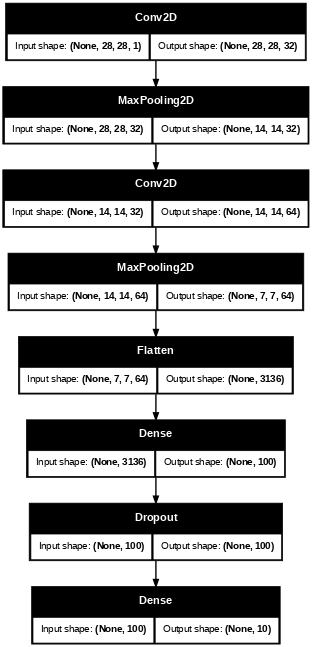

In [ ]:
keras.utils.plot_model(model, show_shapes=True, dpi=50) # 층의 구성을 그림으로 펴현해주는 plot_model() 함수를 이용할 수 있다.

## 모델 컴파일과 훈련

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # adam 옵티마이저를 사용해 컴파일
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras', save_best_only=True) # 최적의 epoch를 찾으면 저장
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True) # 검증 세트의 손실이 2회이상 줄어들지 않으면 조기 종료
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7497 - loss: 0.6962 - val_accuracy: 0.8742 - val_loss: 0.3364
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8728 - loss: 0.3612 - val_accuracy: 0.8924 - val_loss: 0.2877
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8914 - loss: 0.2941 - val_accuracy: 0.9042 - val_loss: 0.2580
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9053 - loss: 0.2640 - val_accuracy: 0.9114 - val_loss: 0.2352
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9136 - loss: 0.2361 - val_accuracy: 0.9128 - val_loss: 0.2315
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9244 - loss: 0.2070 - val_accuracy: 0.9189 - val_loss: 0.2258
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9287 - loss: 0.1916 - val_accuracy: 0.9163 - val_loss: 0.2228
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9363 - loss: 0.1780 

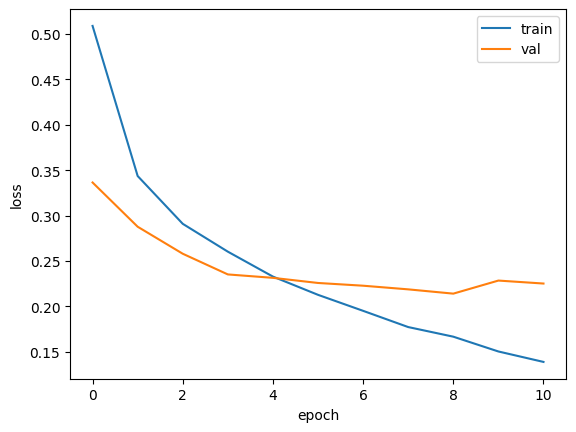

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show() # 9번째 에포크가 최적임을 확인할 수 있다.

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9242 - loss: 0.2056


[0.21410593390464783, 0.9225833415985107]

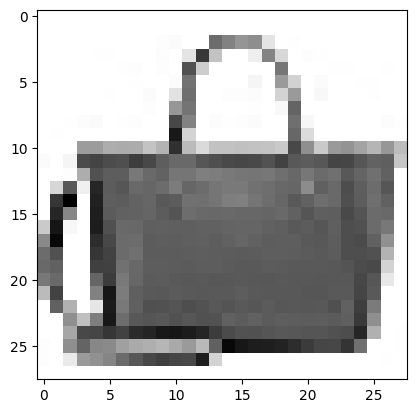

In [ ]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [ ]:
preds = model.predict(val_scaled[0:1]) # 케라스의 fit(), predict(), evaluate() 메서드는 모두 첫 번째 차원이 배치 차원일 것으로 기대하기 때문에 자료를 한 개만 전달하더라도 슬라이싱을 이용해야 한다.
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
[[4.7244983e-22 1.0926234e-29 2.5595182e-23 1.2074171e-24 1.5621884e-21
  1.3268290e-21 3.5309043e-24 5.7683722e-26 1.0000000e+00 6.9805074e-25]]


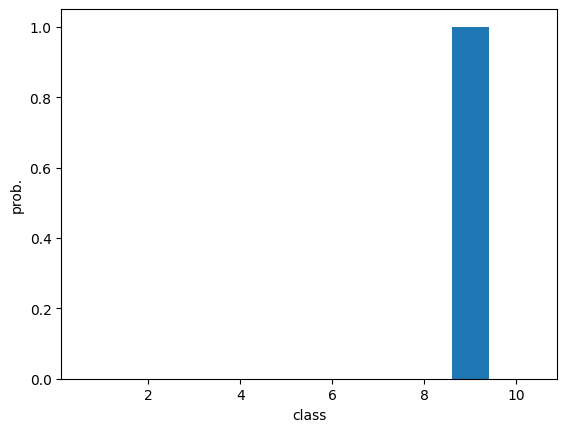

In [ ]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show() # 9번째 클래스일 가능성에 확률이 밀집되어 있음을 확인할 수 있다.

In [ ]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [ ]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [ ]:
test_scaled = test_input.reshape(-1,28,28,1) / 255.0

In [ ]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9146 - loss: 0.2495


[0.23844817280769348, 0.916700005531311]

# 08-3 합성곱 신경망의 시각화

## 가중치 시각화

In [ ]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.keras') # 08-2에서 만든 모델 불러오기

In [ ]:
model.layers

[<Conv2D name=conv2d_2, built=True>,
 <MaxPooling2D name=max_pooling2d_2, built=True>,
 <Conv2D name=conv2d_3, built=True>,
 <MaxPooling2D name=max_pooling2d_3, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [ ]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape) # weights[0]에는 가중치가 weights[1]에는 절편이 저장되어 있다.

(3, 3, 1, 32) (32,)


In [ ]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.04982688 0.30333912


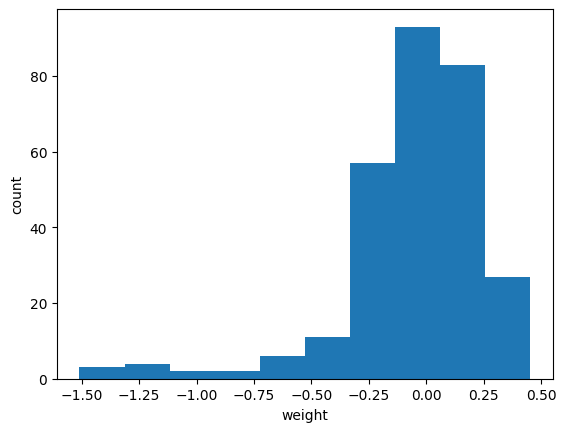

In [ ]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

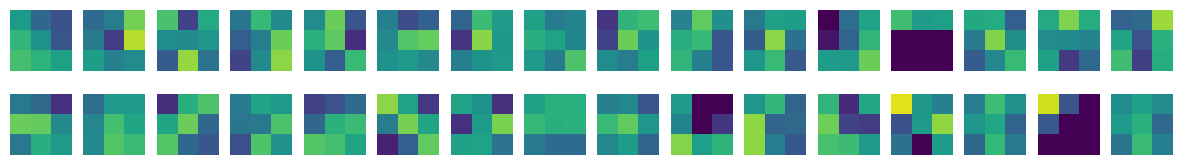

In [ ]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2) :
  for j in range(16) :
    axs[i,j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5) # vmin과 vmax로 colormap으로 편현할 범위를 지정한다.
    axs[i,j].axis('off')
plt.show() # conv_weights에 저장된 필터 32개의 가중치를 그림으로 표현

In [ ]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [ ]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [ ]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std()) # 평균은 훈련을 하고난 후와 비슷하지만, 표준편차는 훈련 전이 훨씬 작은 것을 확인할 수 있다.

0.0033789447 0.08112662


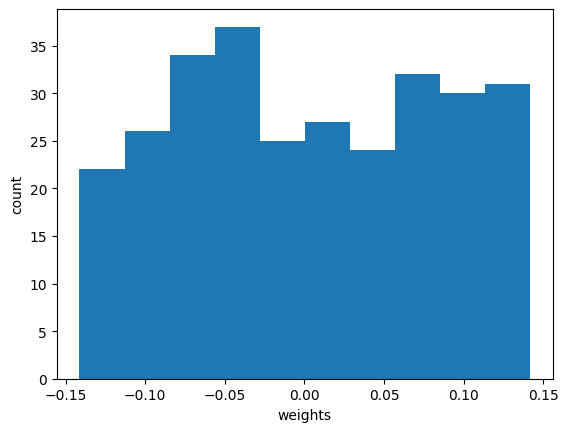

In [ ]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weights')
plt.ylabel('count')
plt.show() # 가중치가 비교적 고른 분포를 보인다.

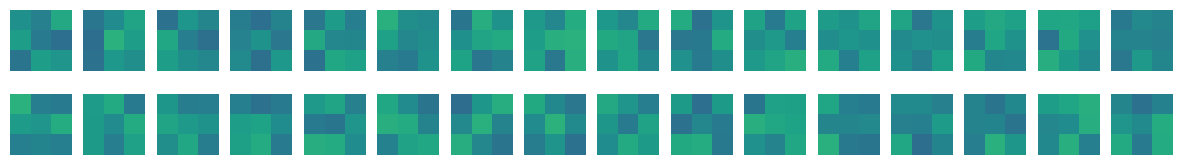

In [ ]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2) :
  for j in range(16) :
    axs[i,j].imshow(no_training_weights[:,:,0,16*i+j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show() # 훈련 전이기 때문에 가중치가 특정한 패턴 없이 랜덤하게 분포되어 있는 것을 확인할 수 있다.

## 함수형 API

 입력이나 출력이 2개 이상인 경우와 같이 복자한 신경망 모델을 만들 때는 Sequential 클래스를 사용할 수 없으며, 대신 함수형API(functional API)를 사용한다.

    dense1 = keras.layers.Dense(100, activation='sigmoid')
    dense2 = keras.layers.Dense(10, activation='softmax')

    hidden = dense1(inputs) # 입력값 inputs을 dense층에 통과시킨 후 출력값 hidden을 만들어 준다.

    outputs = dense2(hidden) # hidden의 출력값을 입력으로 받고 결과를 출력한다.
    
    model = keras.Model(inputs, outputs) #마지막으로 inputs와 outputs를 Model클래스를 이용해 연결해준다.

 여기서 inputs는 InputLayer 클래스의 출력값이 되어야 한다. 기존 Sequential클래스는 InputLayer 클래스를 자동으로 추가하고 호출해 주었으나 Model 클래스에서는 수동으로 만들어서 호출해야한다.

     inputs = keras.Input(shape=(784,)) #Input() 함수를 이용해서 InputLayer 클래스를 만들 수 있다.

 각 층에서의 입력값과 출력값은 각 모델의 input, output 속성에서 얻을 수 있다.
     
    model.input
    model.output


In [ ]:
print(model.inputs) # 처음 모델의 입력값은 inputs 속성에서 얻을 수 있다.

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=input_layer_1>]


In [ ]:
conv_acti = keras.Model(model.inputs, model.layers[0].output) # 입력과 첫 번째 층인 conv2d층의 출력을 연결하여 새로운 모델 생성

## 특성 맵 시각화

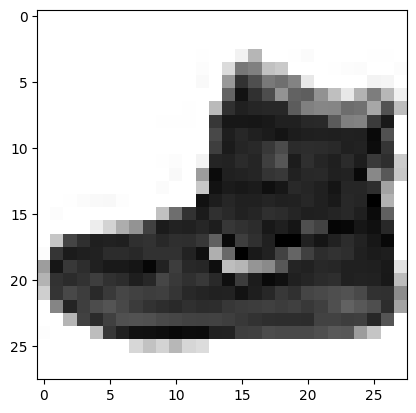

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [ ]:
inputs = train_input.reshape(-1,28,28,1)[0:1] / 255.0
feature_maps = conv_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [ ]:
print(feature_maps.shape)

(1, 28, 28, 32)


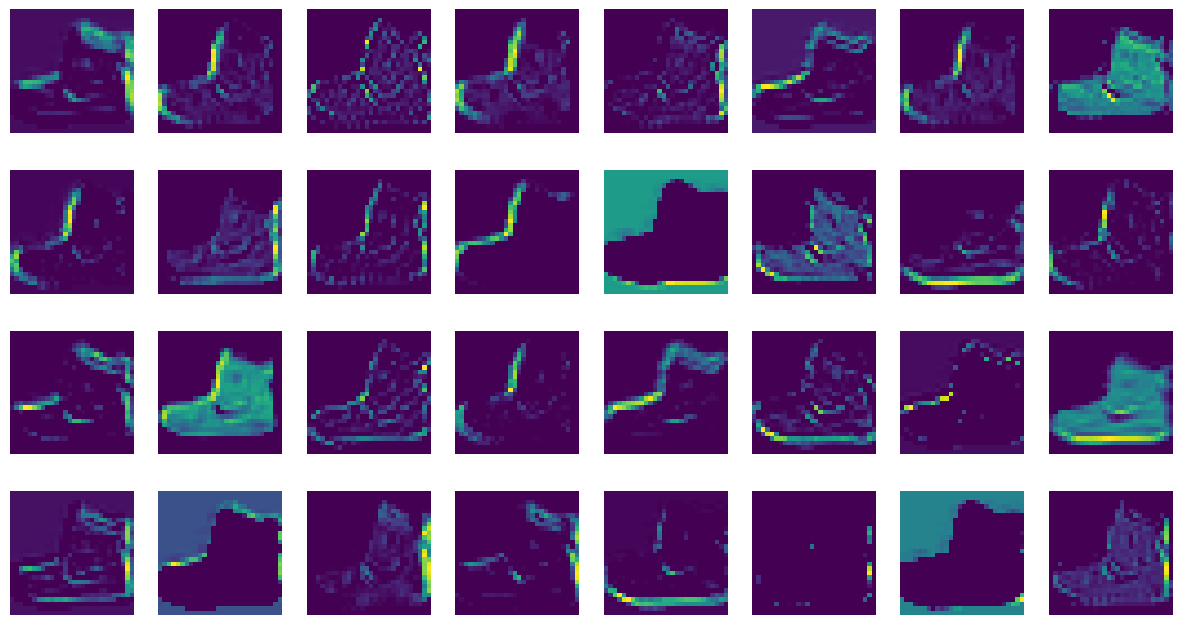

In [ ]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4) :
  for j in range(8) :
    axs[i,j].imshow(feature_maps[0,:, :, i*8+j])
    axs[i,j].axis('off')
plt.show()

In [ ]:
conv2_acti = keras.Model(model.inputs, model.layers[2].output)

In [ ]:
inputs = train_input.reshape(-1,28,28,1)[0:1] / 255.0
feature_maps = conv2_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer_1']
Received: inputs=Tensor(shape=(1, 28, 28, 1))
  warnings.warn(msg)


In [ ]:
print(feature_maps.shape)

(1, 14, 14, 64)


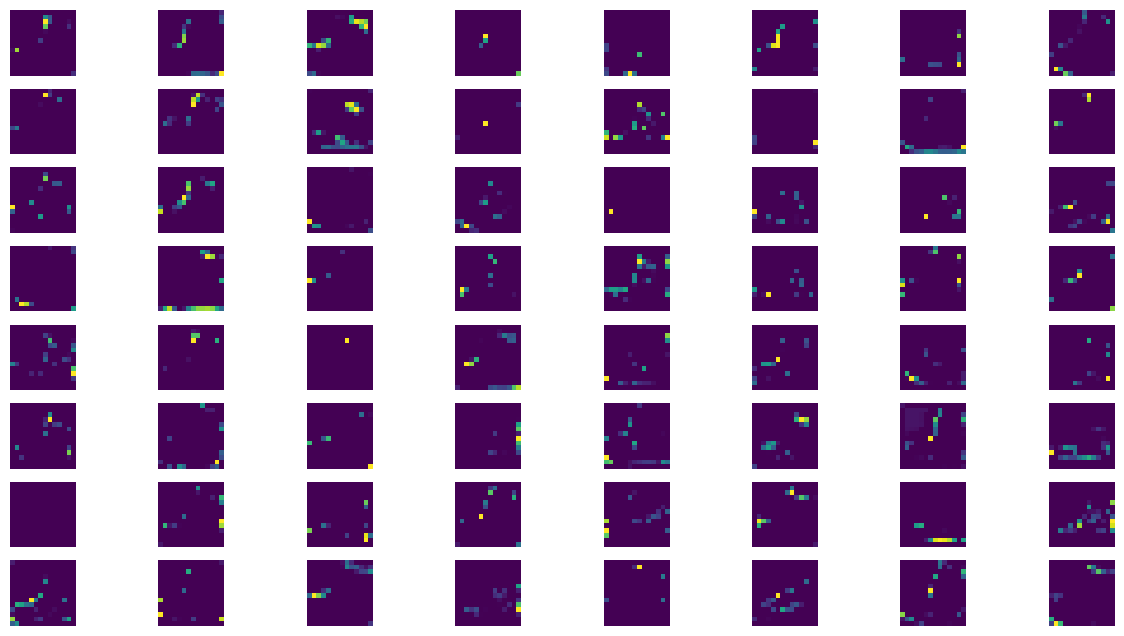

In [ ]:
fig, axs = plt.subplots(8, 8, figsize=(15,8))
for i in range(8) :
  for j in range(8) :
    axs[i,j].imshow(feature_maps[0,:, :, i*8+j])
    axs[i,j].axis('off')
plt.show()